# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
os.chdir('C:/Users/kingsubham27091995/Desktop/AppliedAiCouse/DonorsChoose')

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=10000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (10000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## Preprocessing of Project Grade Category

In [5]:
project_grade_category = []

for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ", "_")
    project_grade_category.append(a)

In [6]:
project_grade_category[0:5]

['Grades_PreK-2', 'Grades_6-8', 'Grades_6-8', 'Grades_PreK-2', 'Grades_PreK-2']

In [7]:
project_data.drop(['project_grade_category'], axis=1, inplace=True)

In [8]:
project_data["project_grade_category"] = project_grade_category

In [9]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   
2           AZ        2016-08-31 12:03:56   
3           KY        2016-10-06 21:16:17   
4           TX        2016-07-11 01:10:09   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   
4                       Math & Science                       Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

  project_grade_category  
0          Grades_PreK-2  
1             Grades_6-8  
2             Grades_6-8  
3          Grades_PreK-2  
4          Grades_PreK-2

## 1.2 preprocessing of `project_subject_categories`

In [10]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [11]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

## Cleaning Titles(Text Preprocessing)

In [12]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
clean_titles = []

for titles in tqdm(project_data["project_title"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    clean_titles.append(title.lower().strip())

100%|█████████████████████████████████| 10000/10000 [00:00<00:00, 20862.00it/s]


In [15]:
project_data["clean_titles"] = clean_titles

In [16]:
project_data.drop(['project_title'], axis=1, inplace=True)

## Finding number of words in title and introducing it in a new column
- This can be used as Numerical Feature for Vectorisation

In [17]:
title_word_count = []
for a in project_data["clean_titles"] :
    b = len(a.split())
    title_word_count.append(b)

In [18]:
project_data["title_word_count"] = title_word_count
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   
2           AZ        2016-08-31 12:03:56   
3           KY        2016-10-06 21:16:17   
4           TX        2016-07-11 01:10:09   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

  project_grade_category                clean_categories  \
0          Grades_PreK-2               Literacy_Language   
1             Grades_6-8    History_Civics Health_Sports   
2             Grades_6-8                   Health_Sports   
3          Grades_PreK-2  Literacy_Language Math_Science   
4          Grades_PreK-2                    Math_Science   

            clean_subcategories  \
0                  ESL Literacy   
1  Civics_Government TeamSports   
2    Health_Wellness TeamSports   
3          Literacy Mathematics   
4                   Mathematics   

                                      clean_titles  title_word_count  
0        educational support english learners home                 5  
1                 wanted projector hungry learners                 4  
2  soccer equipment awesome middle school students                 6  
3                           techie kindergarteners                 2  
4                           interactive math tools                 3

## Combining 4 Essays into 1 Essay Feature

In [19]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [20]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

## Cleaning Essays(Text Preprocessing)

In [21]:
clean_essay = []

for ess in tqdm(project_data["essay"]):
    ess = decontracted(ess)
    ess = ess.replace('\\r', ' ')
    ess = ess.replace('\\"', ' ')
    ess = ess.replace('\\n', ' ')
    ess = re.sub('[^A-Za-z0-9]+', ' ', ess)
    ess = ' '.join(f for f in ess.split() if f not in stopwords)
    clean_essay.append(ess.lower().strip())

100%|███████████████████████████████████| 10000/10000 [00:10<00:00, 974.97it/s]


In [22]:
project_data["clean_essays"] = clean_essay

In [23]:
project_data.drop(['essay'], axis=1, inplace=True)

## Finding number of words in title and introducing it in a new column
- This can be used as Numerical Feature for Vectorisation

In [24]:
essay_word_count = []
for ess in project_data["clean_essays"] :
    c = len(ess.split())
    essay_word_count.append(c)

In [25]:
project_data["essay_word_count"] = essay_word_count
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   
2           AZ        2016-08-31 12:03:56   
3           KY        2016-10-06 21:16:17   
4           TX        2016-07-11 01:10:09   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

  project_grade_category                clean_categories  \
0          Grades_PreK-2               Literacy_Language   
1             Grades_6-8    History_Civics Health_Sports   
2             Grades_6-8                   Health_Sports   
3          Grades_PreK-2  Literacy_Language Math_Science   
4          Grades_PreK-2                    Math_Science   

            clean_subcategories  \
0                  ESL Literacy   
1  Civics_Government TeamSports   
2    Health_Wellness TeamSports   
3          Literacy Mathematics   
4                   Mathematics   

                                      clean_titles  title_word_count  \
0        educational support english learners home                 5   
1                 wanted projector hungry learners                 4   
2  soccer equipment awesome middle school students                 6   
3                           techie kindergarteners                 2   
4                           interactive math tools                 3   

                                        clean_essays  essay_word_count  
0  my students english learners working english s...               161  
1  our students arrive school eager learn they po...               109  
2  true champions not always ones win guts by mia...               202  
3  i work unique school filled esl english second...               121  
4  our second grade classroom next year made arou...               122

## Calculating Sentiment Scores for the Essays Feature

In [26]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [27]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kingsubham27091995\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
analyser = SentimentIntensityAnalyzer()

In [29]:
## http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html
neg = []
pos = []
neu = []
compound = []

for a in tqdm(project_data["clean_essays"]) :
    b = analyser.polarity_scores(a)['neg']
    c = analyser.polarity_scores(a)['pos']
    d = analyser.polarity_scores(a)['neu']
    e = analyser.polarity_scores(a)['compound']
    neg.append(b)
    pos.append(c)
    neu.append(d)
    compound.append(e)

100%|████████████████████████████████████| 10000/10000 [01:51<00:00, 95.89it/s]


In [30]:
project_data["pos"] = pos
project_data["neg"] = neg
project_data["neu"] = neu
project_data["compound"] = compound

project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   
2           AZ        2016-08-31 12:03:56   
3           KY        2016-10-06 21:16:17   
4           TX        2016-07-11 01:10:09   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4    ...                   clean_categories  \
0             NaN    ...                  Literacy_Language   
1             NaN    ...       History_Civics Health_Sports   
2             NaN    ...                      Health_Sports   
3             NaN    ...     Literacy_Language Math_Science   
4             NaN    ...                       Math_Science   

            clean_subcategories  \
0                  ESL Literacy   
1  Civics_Government TeamSports   
2    Health_Wellness TeamSports   
3          Literacy Mathematics   
4                   Mathematics   

                                      clean_titles title_word_count  \
0        educational support english learners home                5   
1                 wanted projector hungry learners                4   
2  soccer equipment awesome middle school students                6   
3                           techie kindergarteners                2   
4                           interactive math tools                3   

                                        clean_essays essay_word_count    pos  \
0  my students english learners working english s...              161  0.144   
1  our students arrive school eager learn they po...              109  0.283   
2  true champions not always ones win guts by mia...              202  0.219   
3  i work unique school filled esl english second...              121  0.246   
4  our second grade classroom next year made arou...              122  0.143   

     neg    neu  compound  
0  0.012  0.844    0.9694  
1  0.048  0.669    0.9856  
2  0.122  0.659    0.9816  
3  0.106  0.649    0.9656  
4  0.066  0.791    0.8524  

[5 rows x 24 columns]

## 1.5 Preparing data for models

In [31]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'project_grade_category', 'clean_categories', 'clean_subcategories',
       'clean_titles', 'title_word_count', 'clean_essays', 'essay_word_count',
       'pos', 'neg', 'neu', 'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

## One Hot Encoding of Clean_Categories

In [32]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (10000, 9)


## One Hot Encoding of Clean_Sub_Categories

In [33]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'FinancialLiteracy', 'CommunityService', 'ForeignLanguages', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'CharacterEducation', 'PerformingArts', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'ESL', 'Health_LifeScience', 'EarlyDevelopment', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (10000, 30)


## One-Hot-Encoding for School-State

In [34]:
from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(str(word).split())

In [35]:

school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))
# we use count vectorizer to convert the values into one hot encoded features
# for STATE
vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())


school_state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encoding ",school_state_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'NH', 'DE', 'SD', 'RI', 'NE', 'AK', 'NM', 'ME', 'DC', 'HI', 'WV', 'ID', 'IA', 'KS', 'AR', 'MN', 'MS', 'OR', 'CO', 'KY', 'NV', 'MD', 'AL', 'TN', 'CT', 'WI', 'UT', 'VA', 'WA', 'MA', 'NJ', 'AZ', 'LA', 'OK', 'IN', 'MO', 'OH', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']
Shape of matrix after one hot encoding  (10000, 51)


## One-Hot-Encoding for Project_Grade_Category

In [36]:
from collections import Counter
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(str(word).split())

In [37]:
project_grade_category_dict = dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))


In [38]:
# we use count vectorizer to convert the values into one hot encoded features
# for Project_Grade_Category
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_category_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())


project_grade_category_one_hot = vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encoding ",project_grade_category_one_hot.shape)

['Grades_9-12', 'Grades_6-8', 'Grades_3-5', 'Grades_PreK-2']
Shape of matrix after one hot encoding  (10000, 4)


## One-Hot_encoding for Teacher_Prefix

In [51]:
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna("")

In [52]:
from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(str(word).split())
    


In [53]:
teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))

In [ ]:
## ValueError: np.nan is an invalid document, expected byte or unicode string.
## The link below explains h0w to tackle such discrepancies.
## https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document/39308809#39308809

vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values.astype("U"))

teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values.astype("U"))

print(vectorizer.get_feature_names())

print("Shape of matrix after one hot encoding ",teacher_prefix_one_hot.shape)

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

### Project Essays

In [55]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(project_data["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow.shape)

Shape of matrix after one hot encoding  (10000, 6213)


### Project Titles

In [56]:
# Similarly you can vectorize for title also
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(project_data["clean_titles"])
print("Shape of matrix after one hot encodig ",title_bow.shape)
print("Number of unique words :" ,title_bow.shape[1])

Shape of matrix after one hot encodig  (10000, 671)
Number of unique words : 671


#### 1.5.2.2 TFIDF vectorizer

### Project Essays

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(project_data["clean_essays"])
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (10000, 6213)


### Project Titles

In [58]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf = vectorizer.fit_transform(project_data["clean_titles"])
print("Shape of matrix after one hot encodig ",title_tfidf.shape)

Shape of matrix after one hot encodig  (10000, 671)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [59]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [63]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

### Project Essays

In [64]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████████████████████████████| 10000/10000 [00:05<00:00, 1892.42it/s]


10000
300


### Project Titles

In [65]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_title_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_vectors.append(vector)

print(len(avg_w2v_title_vectors))
print(len(avg_w2v_title_vectors[0]))

100%|█████████████████████████████████| 10000/10000 [00:00<00:00, 43100.55it/s]


10000
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

### Project Essays

In [66]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_data["clean_essays"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [67]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|███████████████████████████████████| 10000/10000 [00:32<00:00, 312.24it/s]


10000
300


### Project Titles

In [68]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_data["clean_titles"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [69]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_vectors.append(vector)

print(len(tfidf_w2v_title_vectors))
print(len(tfidf_w2v_title_vectors[0]))

100%|█████████████████████████████████| 10000/10000 [00:00<00:00, 19878.09it/s]


10000
300


### 1.5.3 Vectorizing Numerical features

In [60]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

## Price

In [61]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 297.35772799999995, Standard deviation : 391.10985036728243


In [62]:
price_standardized

array([[-0.36500673],
       [ 0.004199  ],
       [ 0.56120364],
       ...,
       [ 0.1434182 ],
       [ 0.07834697],
       [-0.21750341]])

## Quantity

In [63]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

quantity_scalar = StandardScaler()
quantity_scalar.fit(project_data['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_standardized = quantity_scalar.transform(project_data['quantity'].values.reshape(-1, 1))

C:\Users\kingsubham27091995\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



Mean : 16.5516, Standard deviation : 25.299880186277562


C:\Users\kingsubham27091995\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [64]:
quantity_standardized

array([[ 0.25487868],
       [-0.61469066],
       [ 0.2153528 ],
       ...,
       [ 0.0177234 ],
       [-0.57516478],
       [ 0.7687151 ]])

## Number of Previosly Proposed Project by Teacher

In [65]:
import warnings
warnings.filterwarnings('ignore')
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler #Column Standardisation

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

prev_posts_scalar = StandardScaler()
prev_posts_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {prev_posts_scalar.mean_[0]}, Standard deviation : {np.sqrt(prev_posts_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
prev_posts_standardized = prev_posts_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 11.2092, Standard deviation : 27.9321398278041


In [66]:
prev_posts_standardized

array([[-0.40130116],
       [-0.15069379],
       [-0.3655001 ],
       ...,
       [-0.25809695],
       [-0.18649484],
       [-0.22229589]])

## Title Word Count

In [67]:
import warnings
warnings.filterwarnings('ignore')
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler #Column Standardisation



twc_scalar = StandardScaler()
twc_scalar.fit(project_data['title_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {twc_scalar.mean_[0]}, Standard deviation : {np.sqrt(twc_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
twc_standardized =twc_scalar.transform(project_data['title_word_count'].values.reshape(-1, 1))

Mean : 4.3534, Standard deviation : 1.8019734848215718


### Essay Word Count

In [68]:
import warnings
warnings.filterwarnings('ignore')
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler #Column Standardisation



ewc_scalar = StandardScaler()
ewc_scalar.fit(project_data['essay_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {ewc_scalar.mean_[0]}, Standard deviation : {np.sqrt(ewc_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
ewc_standardized =ewc_scalar.transform(project_data['essay_word_count'].values.reshape(-1, 1))

Mean : 151.2674, Standard deviation : 38.7450396469019


### Essay Sentiments- positives

In [69]:
import warnings
warnings.filterwarnings('ignore')
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler #Column Standardisation



pos_scalar = StandardScaler()
pos_scalar.fit(project_data['pos'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {pos_scalar.mean_[0]}, Standard deviation : {np.sqrt(pos_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
pos_standardized =pos_scalar.transform(project_data['pos'].values.reshape(-1, 1))

Mean : 0.2681366, Standard deviation : 0.07391284557125372


## Essay Sentiments - negatives

In [70]:
import warnings
warnings.filterwarnings('ignore')
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler #Column Standardisation



neg_scalar = StandardScaler()
neg_scalar.fit(project_data['neg'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {neg_scalar.mean_[0]}, Standard deviation : {np.sqrt(neg_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
neg_standardized =neg_scalar.transform(project_data['neg'].values.reshape(-1, 1))

Mean : 0.044761100000000005, Standard deviation : 0.03280353070616028


### Essay Sentiments - neutrals

In [71]:
import warnings
warnings.filterwarnings('ignore')
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler #Column Standardisation



neu_scalar = StandardScaler()
neu_scalar.fit(project_data['neu'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {neu_scalar.mean_[0]}, Standard deviation : {np.sqrt(neu_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
neu_standardized =neu_scalar.transform(project_data['neu'].values.reshape(-1, 1))

Mean : 0.6871028, Standard deviation : 0.07238793568102353


## Essay Sentiments - compound

In [72]:
import warnings
warnings.filterwarnings('ignore')
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler #Column Standardisation



com_scalar = StandardScaler()
com_scalar.fit(project_data['compound'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {com_scalar.mean_[0]}, Standard deviation : {np.sqrt(com_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
com_standardized =neu_scalar.transform(project_data['compound'].values.reshape(-1, 1))

Mean : 0.9621767900000001, Standard deviation : 0.14320419292847503


# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

# Using TFIDF as Vectorizer

In [73]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X= hstack((project_grade_category_one_hot, categories_one_hot, sub_categories_one_hot, school_state_one_hot,teacher_prefix_one_hot, price_standardized,quantity_standardized, prev_posts_standardized,twc_standardized,ewc_standardized,pos_standardized,neg_standardized,neu_standardized,com_standardized,text_tfidf,title_tfidf))
X.shape

(10000, 6991)

## Feature selection with SelectKBest

In [74]:

from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=6000).fit_transform(abs(X),project_data['project_is_approved'])

In [75]:
X_new.shape

(10000, 6000)

# Applying K-Means

In [204]:
from sklearn.cluster import KMeans

k_values = [2,4,5,6,8,10]
loss = []
for i in tqdm(k_values):
    kmeans = KMeans(n_clusters=i, n_jobs=-1).fit(X_new)
    loss.append(kmeans.inertia_)

100%|███████████████████████████████████████████| 6/6 [36:45<00:00, 378.87s/it]


## Elbow Method

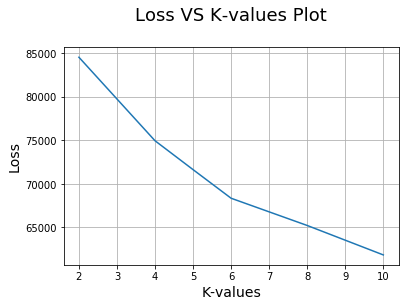

In [205]:
# Draw Loss VS K values plot
plt.plot(k_values, loss)
plt.xlabel('K-values',size=14)
plt.ylabel('Loss',size=14)
plt.title('Loss VS K-values Plot\n',size=18)
plt.grid()
plt.show()

## Summary :-
-  above we can see that there is inflection at K =    5 . Befor it loss was decreasing faster as              compared to the loss decreasing after it . So ,        the best value of K is 5.

In [206]:
from sklearn.cluster import KMeans
optimal_k = 5
# Variable that will be used in the conclusion 
tfidf_means_k = optimal_k

# Implementing K-Means++ using optimal value of K
kmeans = KMeans(n_clusters=optimal_k, n_jobs=-1).fit(X_new)

In [86]:
essays = project_data['clean_essays'].values

# Create Clusters

In [208]:

# Getting all the essays in different clusters
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []

for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster1.append(essays[i])
    elif kmeans.labels_[i] == 1:
        cluster2.append(essays[i])
    elif kmeans.labels_[i] == 2:
        cluster3.append(essays[i])
    elif kmeans.labels_[i] == 3:
        cluster4.append(essays[i])
    else :
        cluster5.append(essays[i]) 
        
# Number of essays in different clusters
print("No. of essays in Cluster-1 : ",len(cluster1))
print("\nNo. of essays in Cluster-2 : ",len(cluster2))
print("\nNo. of essays in Cluster-3 : ",len(cluster3))
print("\nNo. of essays in Cluster-4 : ",len(cluster4))
print("\nNo. of essays in Cluster-5 : ",len(cluster5))        

No. of essays in Cluster-1 :  3840

No. of essays in Cluster-2 :  3731

No. of essays in Cluster-3 :  244

No. of essays in Cluster-4 :  67

No. of essays in Cluster-5 :  2118


## WordClouds for Cluster 1

In [209]:
from nltk import download, FreqDist, WordNetLemmatizer
topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster1).split())
W = [word for word in cluster1 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [210]:
freqDistribution

FreqDist({'students': 28465, 'i': 10156, 'school': 9345, 'learning': 6140, 'classroom': 5515, 'my': 4964, 'the': 4746, 'they': 4527, 'not': 4507, 'learn': 4476, ...})

In [211]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 28465), ('i', 10156), ('school', 9345), ('learning', 6140), ('classroom', 5515), ('my', 4964), ('the', 4746), ('they', 4527), ('not', 4507), ('learn', 4476), ('help', 4333), ('many', 3700), ("nannan',", 3669), ('we', 3605), ('work', 3388), ('need', 3385), ('day', 2777), ('use', 2731), ('able', 2635), ('come', 2616), ('class', 2575), ('would', 2461), ('our', 2336), ('love', 2321), ('this', 2295), ('make', 2285), ('skills', 2248), ('also', 2221), ('year', 2184), ('student', 2147)]


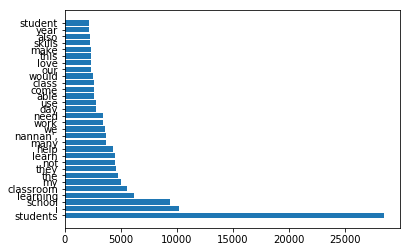

In [212]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

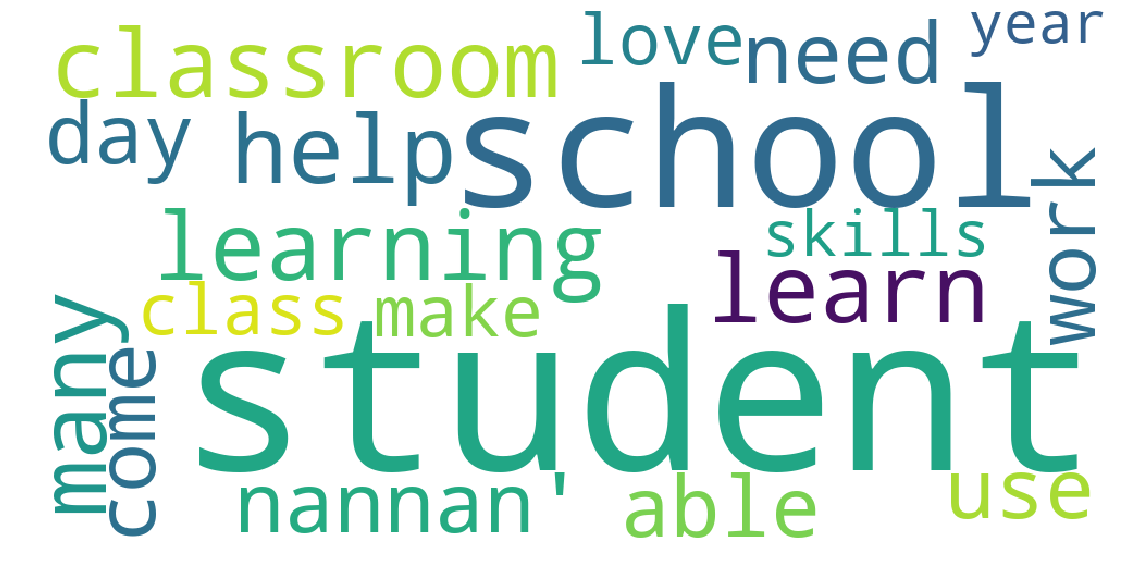

In [213]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

## WordClouds for Cluster 2

In [214]:
topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster2).split())
W = [word for word in cluster2 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [215]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 26665), ('i', 11337), ('school', 8421), ('classroom', 6586), ('learning', 6275), ('reading', 5811), ('my', 5009), ('the', 4471), ('they', 4455), ('not', 4421), ('help', 4328), ('learn', 4295), ('books', 4051), ('many', 3708), ("nannan',", 3567), ('we', 3207), ('need', 3138), ('read', 3121), ('work', 3094), ('love', 3068), ('use', 3049), ('technology', 2734), ('day', 2650), ('come', 2639), ('able', 2578), ('class', 2447), ('skills', 2390), ('would', 2381), ('also', 2308), ('year', 2252)]


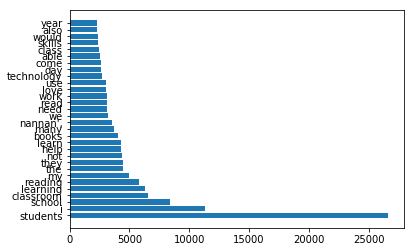

In [216]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

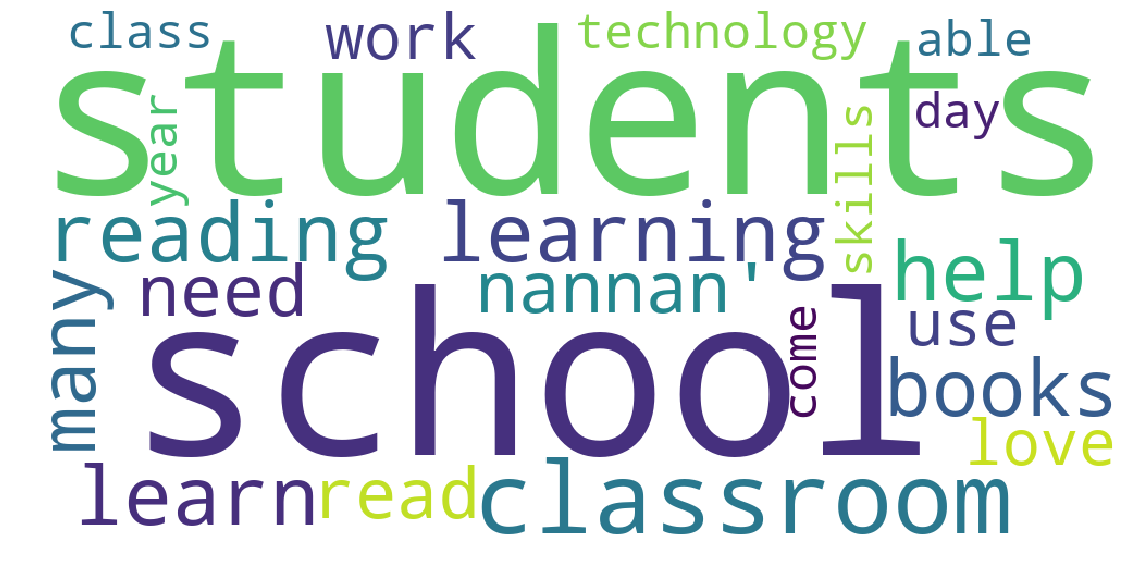

In [217]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

## Reading an essay from a cluster

In [218]:
count=1
for i in range(3):
    print('Essay-%d : \n %s\n'%(count,cluster1[i]))
    count +=1

Essay-1 : 
 our students arrive school eager learn they polite generous strive best they know education succeed life help improve lives our school focuses families low incomes tries give student education deserve while not much students use materials given best the projector need school crucial academic improvement students as technology continues grow many resources internet teachers use growth students however school limited resources particularly technology without disadvantage one things could really help classrooms projector with projector not crucial instruction also growth students with projector show presentations documentaries photos historical land sites math problems much with projector make teaching learning easier also targeting different types learners classrooms auditory visual kinesthetic etc nannan

Essay-2 : 
 true champions not always ones win guts by mia hamm this quote best describes students cholla middle school approach playing sports especially girls boys soccer

In [219]:
count=1
for i in range(3):
    print('Essay-%d : \n %s\n'%(count,cluster2[i]))
    count +=1

Essay-1 : 
 i work unique school filled esl english second language high poverty students our students individual personal struggles would break heart step doors would not notice anything positive resilient attitude learning my students love support every aspect learning journey we students all world speaking 77 different languages like family every student welcomed open arms regardless come language speak education love universal language classroom plenty my students live high poverty conditions limited no access technology ipads provide opportunity learn playing reading math games engage inspire these ipads surely hottest commodity classroom students beg get play educational games i tracking data ipad several educational programs help differentiate learning student students also able track progress programs i look forward seeing students grow use ipads nannan

Essay-2 : 
 i moving 2nd grade 3rd grade beginning next school year i takings current students move i teach inclusion classro

In [220]:
count=1
for i in range(3):
    print('Essay-%d : \n %s\n'%(count,cluster3[i]))
    count +=1

Essay-1 : 
 my students awesome they creative excited learning i privileged teach music rural public school serving 900 students grades kindergarten 4th including special group children facing severe physical mental disabilities in school high poverty i strive daily provide equitable music experience students this experience includes exposing students new instruments musical cultures music history music expression self because many students lack funding physical ability travel unique musical settings i strive bring creative musical world classroom i want see students get healthier teaching students means american teaching folk songs step down african american traditions american folk songs children anna banana 101 jump rope well types folk songs games jumping rope dancing we jumping rope songs like sheep meadow dancing songs like little sally water playing games songs this incorporates history well music i think lots fun students well we get moving still learning nannan

Essay-2 : 
 al

In [221]:
count=1
for i in range(3):
    print('Essay-%d : \n %s\n'%(count,cluster4[i]))
    count +=1

Essay-1 : 
 my students sixths graders public middle school los angeles the majority students come economically disadvantaged households they face many barriers comes equal access including lack access technology homes community we unique school incorporates performing arts curricular areas we dance sing math science our classroom old much furniture broken falling apart i requesting 36 sturdy chairs students use daily our current chairs big tables falling apart students uncomfortable even get hurt our classroom needs flexible far groupings new chairs would make much easier we performing arts school incorporate dance curricular areas these stackable chairs allow us make space movement math science class your donation help make classroom flexible active learning environment the new chairs increase peer peer interaction collaboration nannan

Essay-2 : 
 my students often borrow calculators class time i not enough loan class i requesting money purchase class set 10 100 a matched donation w

In [222]:
count=1
for i in range(3):
    print('Essay-%d : \n %s\n'%(count,cluster5[i]))
    count +=1

Essay-1 : 
 my students english learners working english second third languages we melting pot refugees immigrants native born americans bringing gift language school we 24 languages represented english learner program students every level mastery we also 40 countries represented families within school each student brings wealth knowledge experiences us open eyes new cultures beliefs respect the limits language limits world ludwig wittgenstein our english learner strong support system home begs resources many times parents learning read speak english along side children sometimes creates barriers parents able help child learn phonetics letter recognition reading skills by providing dvd players students able continue mastery english language even no one home able assist all families students within level 1 proficiency status offered part program these educational videos specially chosen english learner teacher sent home regularly watch the videos help child develop early reading skills 

## AGGLOMERATIVE CLUSTERING

## Hierarchical Clustering with 2 clusters

In [223]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2).fit(X_new.toarray())

# Getting all the ESSAYS in dif3ferent clusters
cluster1 = []
cluster2 = []

for i in tqdm(range(model.labels_.shape[0])):
    if model.labels_[i] == 0:
        cluster1.append(essays[i])
    else :
        cluster2.append(essays[i])

# Number of essays in different clusters
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-2 : ",len(cluster2))

100%|████████████████████████████████| 10000/10000 [00:00<00:00, 265766.73it/s]


No. of reviews in Cluster-1 :  9933

No. of reviews in Cluster-2 :  67


# WordCloud for Cluster 1

In [224]:
topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster1).split())
W = [word for word in cluster1 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [225]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 71585), ('i', 28237), ('school', 23285), ('learning', 15948), ('classroom', 15560), ('my', 12987), ('the', 11873), ('they', 11764), ('not', 11692), ('learn', 11399), ('help', 11277), ("nannan',", 9503), ('many', 9496), ('we', 8891), ('need', 8528), ('work', 8370), ('reading', 8156), ('use', 7612), ('love', 7213), ('day', 7014), ('come', 6793), ('able', 6744), ('class', 6525), ('would', 6298), ('technology', 5996), ('skills', 5902), ('also', 5825), ('year', 5784), ('books', 5751), ('this', 5696)]


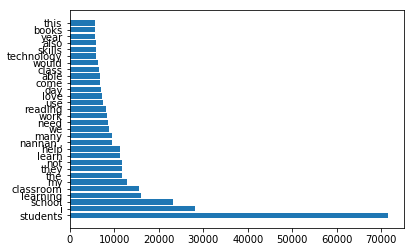

In [226]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

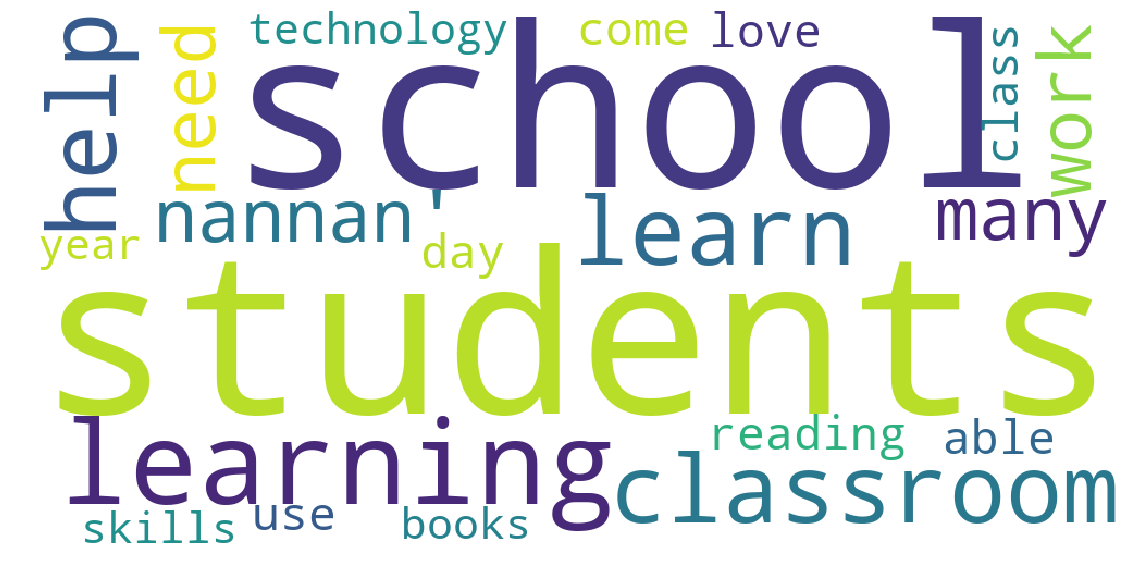

In [227]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

# WordCloud for Cluster 2

In [228]:
topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster2).split())
W = [word for word in cluster2 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [229]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 438), ('school', 196), ('i', 170), ('not', 127), ('they', 94), ('the', 82), ('need', 77), ('my', 76), ('many', 63), ("nannan',", 61), ('we', 56), ('classroom', 51), ('help', 51), ('come', 49), ('our', 46), ('use', 45), ('student', 45), ('reading', 43), ('class', 42), ('no', 41), ('make', 40), ('work', 40), ('able', 39), ('high', 39), ('learn', 39), ('math', 38), ('learning', 38), ('this', 38), ('get', 37), ('poverty', 36)]


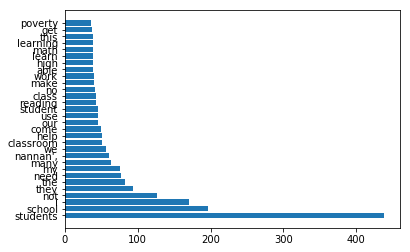

In [230]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

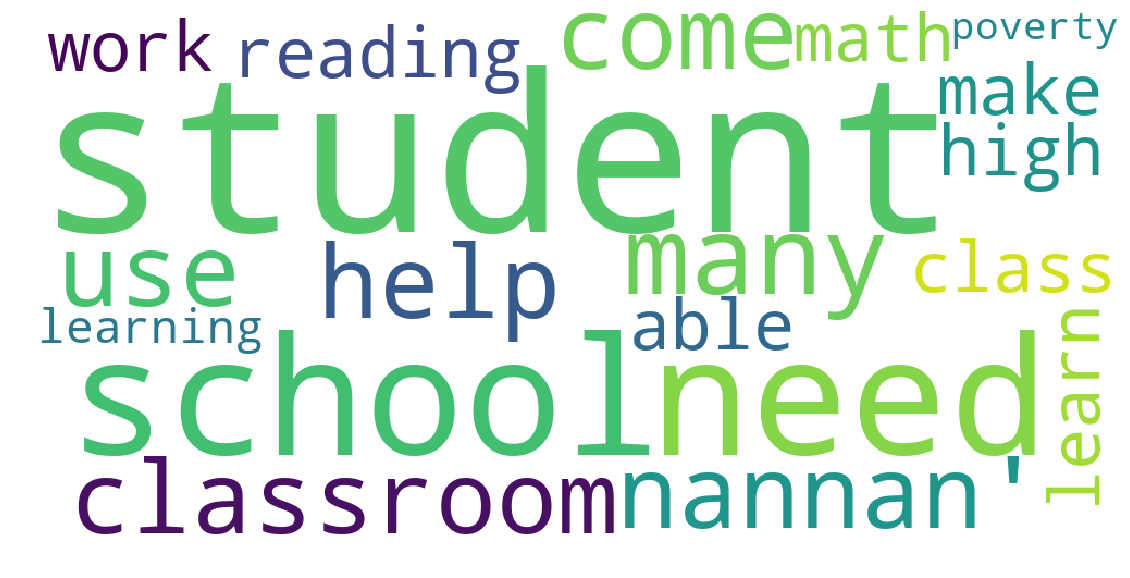

In [231]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

### Reading essays from a cluster

In [232]:
## Cluster 1
count=1
for i in range(3):
    if i < len(cluster1):
        print('Essay-%d : \n %s\n'%(count,cluster1[i]))
        count +=1

Essay-1 : 
 my students english learners working english second third languages we melting pot refugees immigrants native born americans bringing gift language school we 24 languages represented english learner program students every level mastery we also 40 countries represented families within school each student brings wealth knowledge experiences us open eyes new cultures beliefs respect the limits language limits world ludwig wittgenstein our english learner strong support system home begs resources many times parents learning read speak english along side children sometimes creates barriers parents able help child learn phonetics letter recognition reading skills by providing dvd players students able continue mastery english language even no one home able assist all families students within level 1 proficiency status offered part program these educational videos specially chosen english learner teacher sent home regularly watch the videos help child develop early reading skills 

In [233]:
## Cluster 2
count=1
for i in range(3):
    if i < len(cluster2):
        print('Essay-%d : \n %s\n'%(count,cluster2[i]))
        count +=1

Essay-1 : 
 my students sixths graders public middle school los angeles the majority students come economically disadvantaged households they face many barriers comes equal access including lack access technology homes community we unique school incorporates performing arts curricular areas we dance sing math science our classroom old much furniture broken falling apart i requesting 36 sturdy chairs students use daily our current chairs big tables falling apart students uncomfortable even get hurt our classroom needs flexible far groupings new chairs would make much easier we performing arts school incorporate dance curricular areas these stackable chairs allow us make space movement math science class your donation help make classroom flexible active learning environment the new chairs increase peer peer interaction collaboration nannan

Essay-2 : 
 my students often borrow calculators class time i not enough loan class i requesting money purchase class set 10 100 a matched donation w

## Hierarchical Clustering with 5 clusters

In [234]:
model = AgglomerativeClustering(n_clusters=5).fit(X_new.toarray())

cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []

for i in range(model.labels_.shape[0]):
    if model.labels_[i] == 0:
        cluster1.append(essays[i])
    elif model.labels_[i] == 1:
        cluster2.append(essays[i])
    elif model.labels_[i] == 2:
        cluster3.append(essays[i])
    elif model.labels_[i] == 3:
        cluster4.append(essays[i])
    else :
        cluster5.append(essays[i]) 
        
# Number of essays in different clusters
print("No. of essays in Cluster-1 : ",len(cluster1))
print("\nNo. of essays in Cluster-2 : ",len(cluster2))
print("\nNo. of essays in Cluster-3 : ",len(cluster3))
print("\nNo. of essays in Cluster-4 : ",len(cluster4))
print("\nNo. of essays in Cluster-5 : ",len(cluster5)) 

No. of essays in Cluster-1 :  7404

No. of essays in Cluster-2 :  2306

No. of essays in Cluster-3 :  213

No. of essays in Cluster-4 :  10

No. of essays in Cluster-5 :  67


# WordCloud for Cluster 1

In [235]:
topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster1).split())
W = [word for word in cluster1 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [236]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 53801), ('i', 21418), ('school', 17639), ('classroom', 11580), ('learning', 11189), ('my', 9817), ('not', 9100), ('the', 8843), ('they', 8723), ('help', 8547), ('learn', 8160), ('many', 7201), ("nannan',", 7083), ('reading', 7030), ('we', 6539), ('need', 6454), ('work', 6236), ('love', 5521), ('day', 5389), ('use', 5261), ('books', 5094), ('come', 5083), ('able', 4995), ('class', 4927), ('would', 4696), ('year', 4419), ('also', 4378), ('skills', 4355), ('this', 4271), ('new', 4192)]


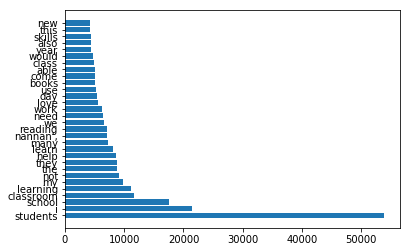

In [237]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

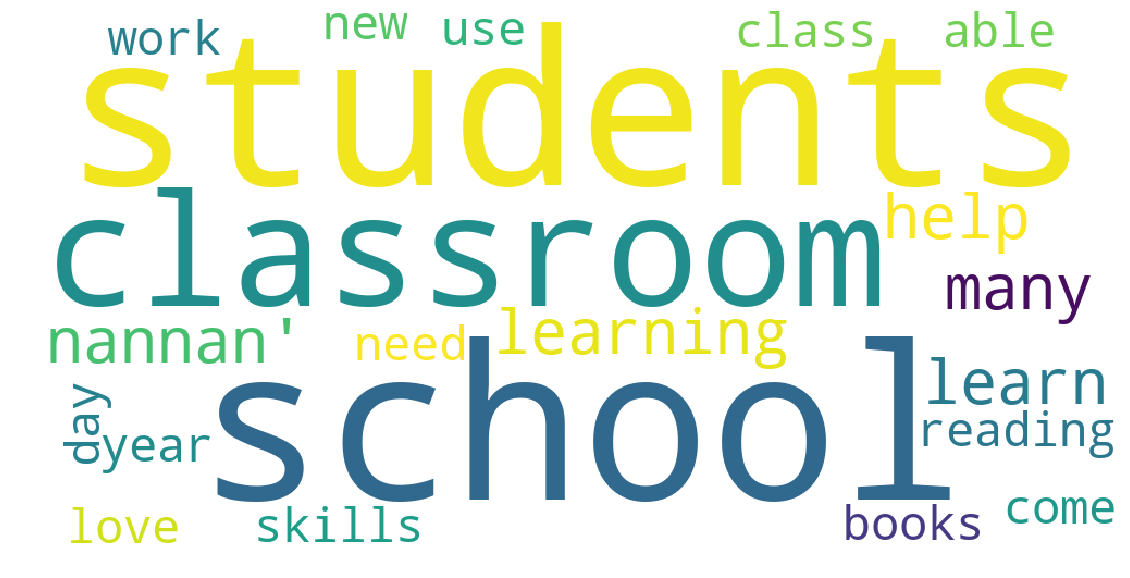

In [238]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

# WordCloud for Cluster 2

In [239]:
topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster2).split())
W = [word for word in cluster2 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [240]:

mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 16295), ('i', 6119), ('school', 5055), ('learning', 4473), ('classroom', 3752), ('learn', 2990), ('my', 2838), ('the', 2743), ('they', 2725), ('help', 2487), ('not', 2369), ('technology', 2213), ("nannan',", 2203), ('use', 2186), ('many', 2111), ('math', 2104), ('we', 2079), ('work', 1957), ('need', 1826), ('science', 1729), ('able', 1634), ('come', 1578), ('love', 1542), ('would', 1480), ('skills', 1466), ('day', 1461), ('class', 1449), ('make', 1327), ('also', 1324), ('this', 1282)]


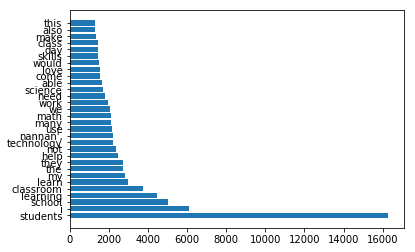

In [241]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

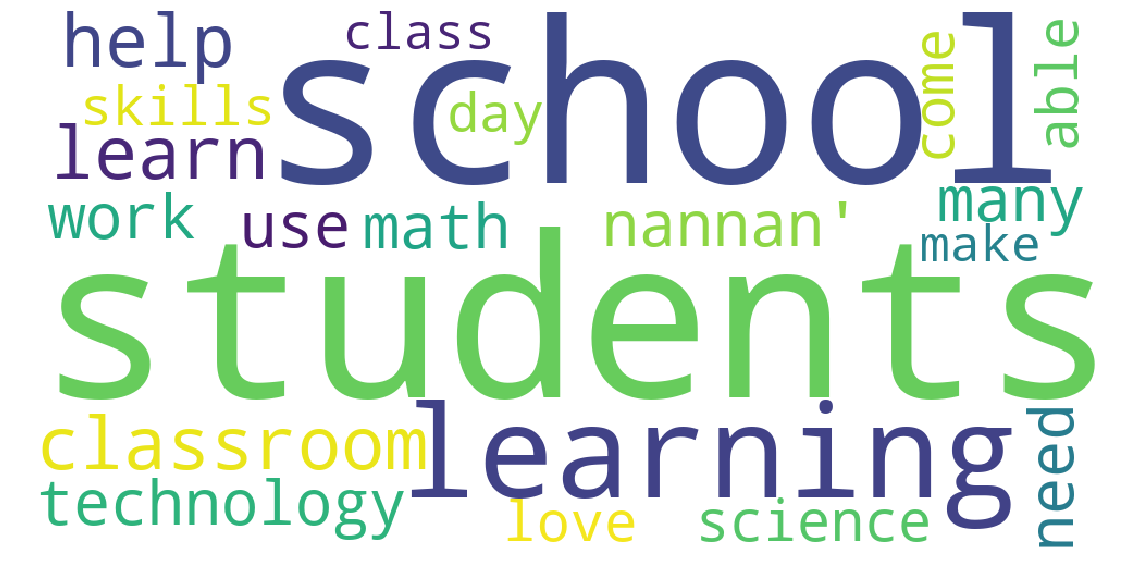

In [242]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

# WordCloud for Cluster 3

In [243]:
topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster3).split())
W = [word for word in cluster3 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [244]:

mostcommon = freqDistribution.most_common(30)
print(mostcommon)


[('students', 1412), ('i', 671), ('school', 569), ('my', 324), ('they', 302), ('the', 275), ('learning', 274), ('we', 255), ('need', 239), ('learn', 239), ('help', 239), ('classroom', 212), ('not', 209), ("nannan',", 205), ('make', 178), ('many', 175), ('work', 168), ('science', 165), ('day', 163), ('use', 155), ('want', 152), ('love', 147), ('class', 142), ('this', 135), ('year', 132), ('get', 130), ('come', 127), ('books', 123), ('children', 119), ('new', 119)]


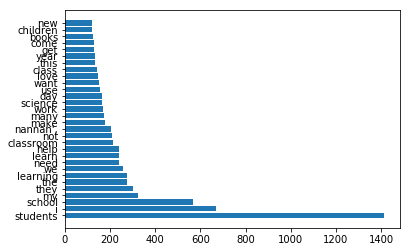

In [245]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

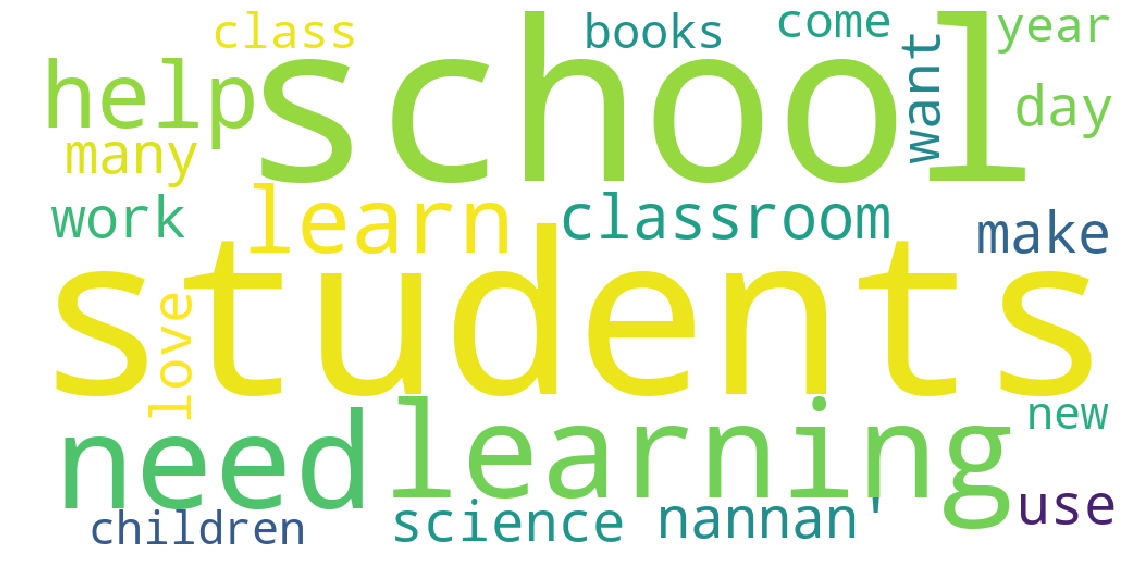

In [246]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

# WordCloud for Cluster 4

In [247]:
topWordsCount = []
freqDistribution = FreqDist(str(cluster4).split())
W = [word for word in cluster4 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [248]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 77), ('i', 29), ('school', 22), ('we', 18), ('classroom', 16), ('technology', 16), ('not', 14), ('they', 14), ('learning', 12), ('the', 12), ('world', 11), ('without', 11), ('want', 10), ('learn', 10), ('use', 10), ('access', 9), ('google', 9), ('kit', 9), ('one', 9), ("nannan',", 9), ('work', 9), ('need', 9), ('many', 9), ('able', 8), ('my', 8), ('would', 8), ('this', 8), ('also', 7), ('class', 7), ('explore', 7)]


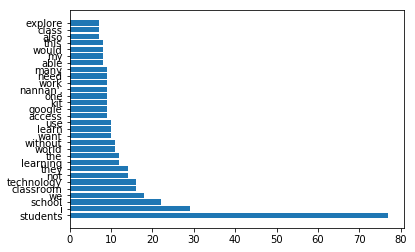

In [249]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

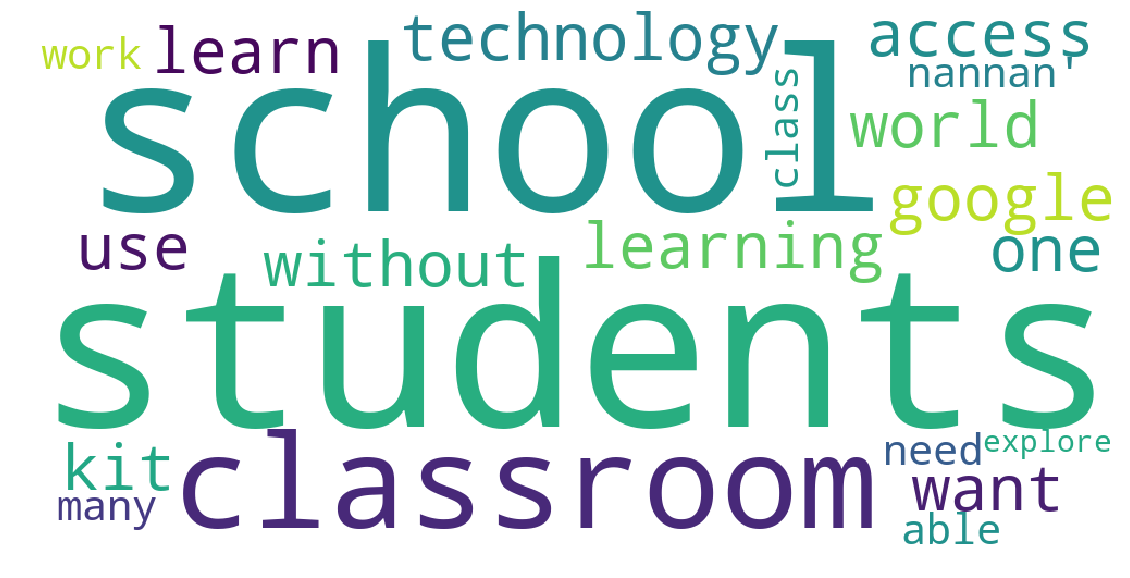

In [250]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

# WordCloud for Cluster 5

In [251]:
topWordsCount = []
freqDistribution = FreqDist(str(cluster5).split())
W = [word for word in cluster5 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [252]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 438), ('school', 196), ('i', 170), ('not', 127), ('they', 94), ('the', 82), ('need', 77), ('my', 76), ('many', 63), ("nannan',", 61), ('we', 56), ('classroom', 51), ('help', 51), ('come', 49), ('our', 46), ('use', 45), ('student', 45), ('reading', 43), ('class', 42), ('no', 41), ('make', 40), ('work', 40), ('able', 39), ('high', 39), ('learn', 39), ('math', 38), ('learning', 38), ('this', 38), ('get', 37), ('poverty', 36)]


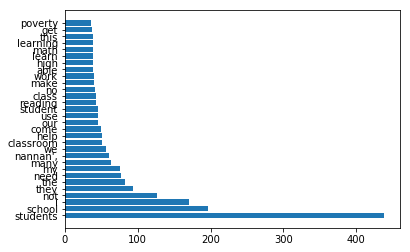

In [253]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

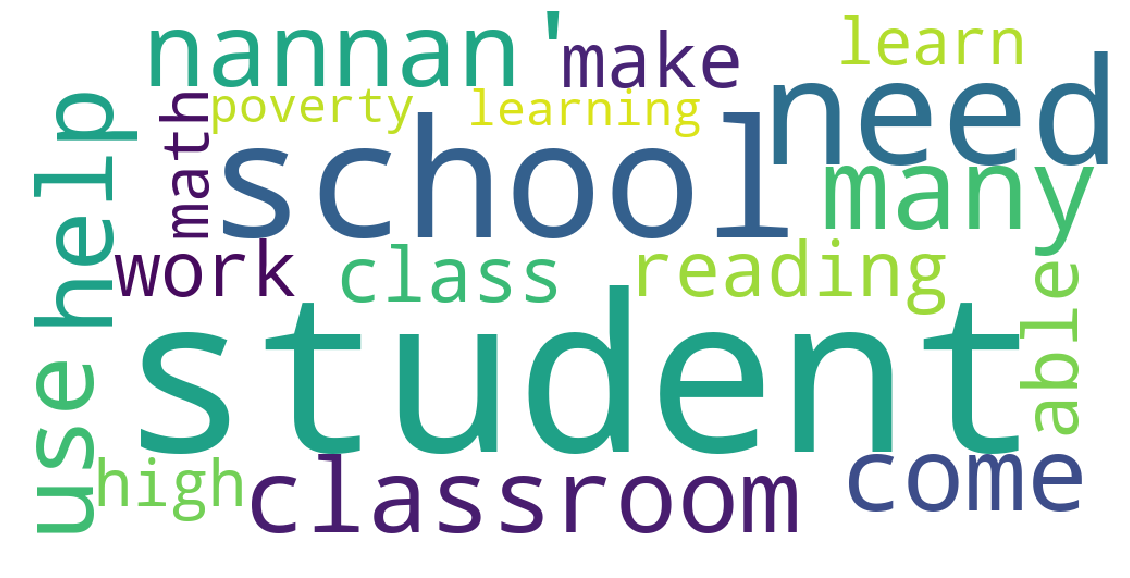

In [254]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

### Reading essays from a cluster

In [255]:
## Cluster 1
count=1
for i in range(3):
    if i < len(cluster1):
        print('Essay-%d : \n %s\n'%(count,cluster1[i]))
        count +=1

Essay-1 : 
 my students english learners working english second third languages we melting pot refugees immigrants native born americans bringing gift language school we 24 languages represented english learner program students every level mastery we also 40 countries represented families within school each student brings wealth knowledge experiences us open eyes new cultures beliefs respect the limits language limits world ludwig wittgenstein our english learner strong support system home begs resources many times parents learning read speak english along side children sometimes creates barriers parents able help child learn phonetics letter recognition reading skills by providing dvd players students able continue mastery english language even no one home able assist all families students within level 1 proficiency status offered part program these educational videos specially chosen english learner teacher sent home regularly watch the videos help child develop early reading skills 

In [256]:
## Cluster 2
count=1
for i in range(3):
    if i < len(cluster2):
        print('Essay-%d : \n %s\n'%(count,cluster2[i]))
        count +=1

Essay-1 : 
 not students struggle poverty also learning master english language minority students represent 35 student population regardless background socioeconomic status students deserve high quality education these children future these students eager learn filled excitement opportunity use technology classroom however almost 650 students attending school 4 ipad carts entire building not get much exposure need as educator vital i try help become apart 21 century digital age these ipads allow my students need 4 ipads latest technology classroom a long time ago used paper pencils teaching students that time passed in 21st century students need latest technology stay ahead my students fully engaged use technology hear pin drop room ipads make simplest tasks fun for example instead worksheets use interactive apps practice math skills the mobility ipad also important students using around classroom sometimes areas school i requesting 4 ipads use classroom my students use listen digital 

In [257]:
## Cluster 3
count=1
for i in range(3):
    if i < len(cluster3):
        print('Essay-%d : \n %s\n'%(count,cluster3[i]))
        count +=1

Essay-1 : 
 my students awesome they creative excited learning i privileged teach music rural public school serving 900 students grades kindergarten 4th including special group children facing severe physical mental disabilities in school high poverty i strive daily provide equitable music experience students this experience includes exposing students new instruments musical cultures music history music expression self because many students lack funding physical ability travel unique musical settings i strive bring creative musical world classroom i want see students get healthier teaching students means american teaching folk songs step down african american traditions american folk songs children anna banana 101 jump rope well types folk songs games jumping rope dancing we jumping rope songs like sheep meadow dancing songs like little sally water playing games songs this incorporates history well music i think lots fun students well we get moving still learning nannan

Essay-2 : 
 or

In [258]:
## Cluster 4
count=1
for i in range(3):
    if i < len(cluster4):
        print('Essay-%d : \n %s\n'%(count,cluster4[i]))
        count +=1

Essay-1 : 
 i always trying show students much i care want able see classroom safe place learn social academic skills i want give students access much learning tools possible take i show use make stronger areas go grow school having google expedition kit classroom allow different style learning one way expedition kit used show students different locations around world land sea another way students use kit building knowledge different animals environments creating reports based virtual experiences these google expedition kids also deepen science math reading writing lessons exposing students different environments around world because technology gap school i hoping kit help close gap introduce new way experiencing learning i truly hoping students get experience expedition kit end year nannan

Essay-2 : 
 every morning start saying good morning half schools esl students chinese by obtaining apple products i easily translate words students still lesson projected board another benefit stud

In [259]:
## Cluster 5
count=1
for i in range(3):
    if i < len(cluster5):
        print('Essay-%d : \n %s\n'%(count,cluster5[i]))
        count +=1

Essay-1 : 
 my students sixths graders public middle school los angeles the majority students come economically disadvantaged households they face many barriers comes equal access including lack access technology homes community we unique school incorporates performing arts curricular areas we dance sing math science our classroom old much furniture broken falling apart i requesting 36 sturdy chairs students use daily our current chairs big tables falling apart students uncomfortable even get hurt our classroom needs flexible far groupings new chairs would make much easier we performing arts school incorporate dance curricular areas these stackable chairs allow us make space movement math science class your donation help make classroom flexible active learning environment the new chairs increase peer peer interaction collaboration nannan

Essay-2 : 
 my students often borrow calculators class time i not enough loan class i requesting money purchase class set 10 100 a matched donation w

## Hierarchical Clustering with 10 clusters

In [260]:
model = AgglomerativeClustering(n_clusters=10).fit(X_new.toarray())
# Getting all the essays in different clusters
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
cluster8 = []
cluster9 = []
cluster10 = []

for i in range(model.labels_.shape[0]):
    if model.labels_[i] == 0:
        cluster1.append(essays[i])
    elif model.labels_[i] == 1:
        cluster2.append(essays[i])
    elif model.labels_[i] == 2:
        cluster3.append(essays[i])
    elif model.labels_[i] == 3:
        cluster4.append(essays[i])
    elif model.labels_[i] == 4:
        cluster5.append(essays[i])
    elif model.labels_[i] == 5:
        cluster6.append(essays[i])
    elif model.labels_[i] == 6:
        cluster7.append(essays[i])
    elif model.labels_[i] == 7:
        cluster8.append(essays[i])
    elif model.labels_[i] == 8:
        cluster9.append(essays[i])       
    else :
        cluster10.append(essays[i])
        
print("  No. of essays in Cluster-1 : ",len(cluster1))
print("\nNo. of essays in Cluster-2 : ",len(cluster2))
print("\nNo. of essays in Cluster-3 : ",len(cluster3))
print("\nNo. of essays in Cluster-4 : ",len(cluster4))
print("\nNo. of essays in Cluster-5 : ",len(cluster5)) 
print("\nNo. of essays in Cluster-6 : ",len(cluster6))
print("\nNo. of essays in Cluster-7 : ",len(cluster7))
print("\nNo. of essays in Cluster-8 : ",len(cluster8))
print("\nNo. of essays in Cluster-9 : ",len(cluster9))
print("\nNo. of essays in Cluster-10 : ",len(cluster10)) 

  No. of essays in Cluster-1 :  2449

No. of essays in Cluster-2 :  2306

No. of essays in Cluster-3 :  2670

No. of essays in Cluster-4 :  521

No. of essays in Cluster-5 :  67

No. of essays in Cluster-6 :  213

No. of essays in Cluster-7 :  321

No. of essays in Cluster-8 :  10

No. of essays in Cluster-9 :  951

No. of essays in Cluster-10 :  492


# For Cluster 1:

In [261]:
topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster1).split())
W = [word for word in cluster1 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [262]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 16905), ('i', 7405), ('school', 5283), ('reading', 4307), ('classroom', 3944), ('learning', 3537), ('books', 3258), ('my', 3207), ('they', 2837), ('not', 2826), ('the', 2758), ('help', 2712), ('learn', 2572), ('read', 2455), ("nannan',", 2356), ('love', 2318), ('many', 2279), ('need', 1967), ('we', 1917), ('work', 1840), ('use', 1685), ('come', 1685), ('day', 1591), ('class', 1565), ('able', 1537), ('year', 1512), ('would', 1510), ('want', 1430), ('new', 1414), ('skills', 1408)]


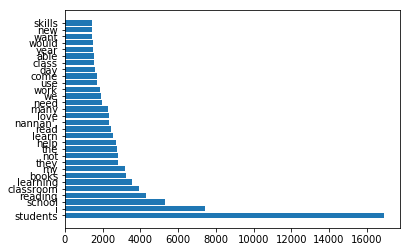

In [263]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

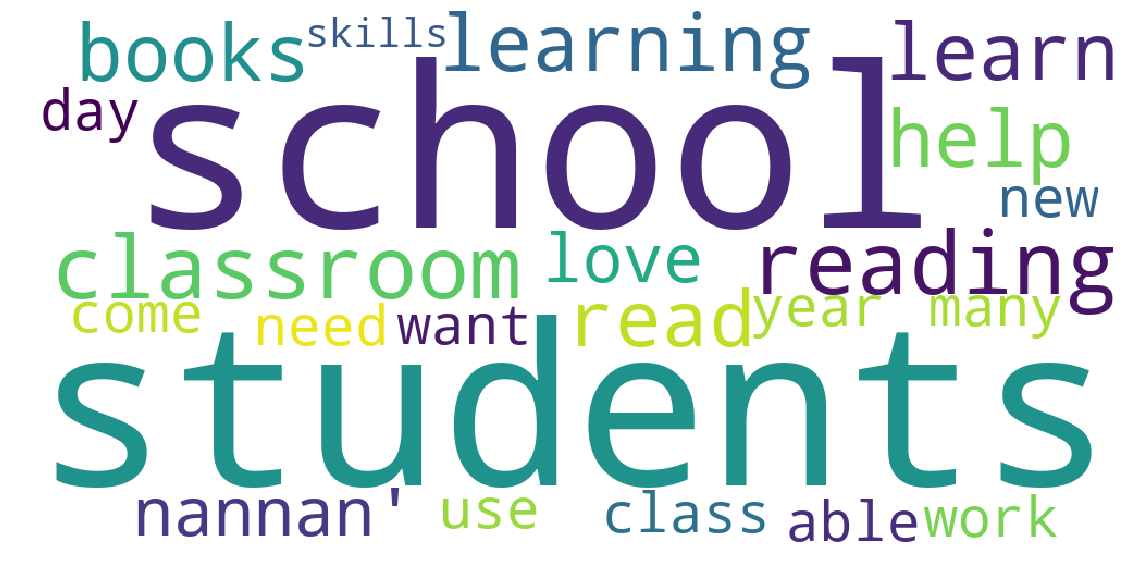

In [264]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

# For Cluster 2:

In [265]:
topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster2).split())
W = [word for word in cluster2 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [266]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 16295), ('i', 6119), ('school', 5055), ('learning', 4473), ('classroom', 3752), ('learn', 2990), ('my', 2838), ('the', 2743), ('they', 2725), ('help', 2487), ('not', 2369), ('technology', 2213), ("nannan',", 2203), ('use', 2186), ('many', 2111), ('math', 2104), ('we', 2079), ('work', 1957), ('need', 1826), ('science', 1729), ('able', 1634), ('come', 1578), ('love', 1542), ('would', 1480), ('skills', 1466), ('day', 1461), ('class', 1449), ('make', 1327), ('also', 1324), ('this', 1282)]


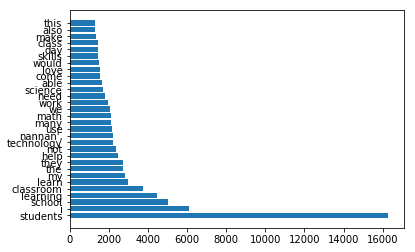

In [267]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

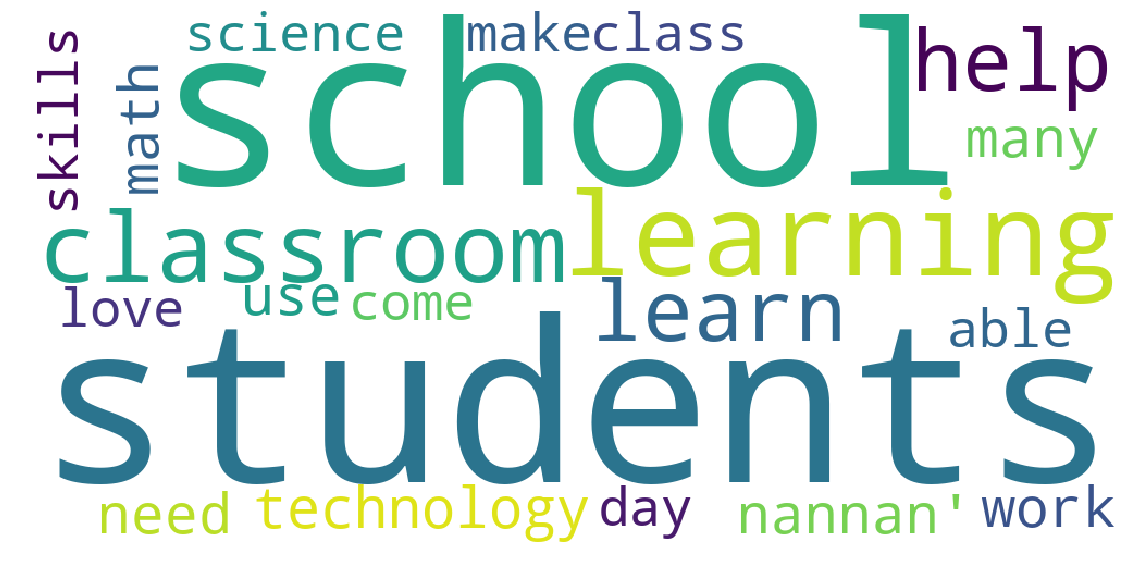

In [268]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

# For Cluster 3:

In [269]:
topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster3).split())
W = [word for word in cluster3 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [270]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 18530), ('i', 6867), ('school', 6835), ('learning', 3663), ('classroom', 3593), ('my', 3376), ('they', 3291), ('not', 3166), ('the', 3119), ('learn', 3006), ('help', 2909), ("nannan',", 2569), ('we', 2542), ('many', 2503), ('work', 2184), ('need', 2165), ('day', 2048), ('love', 1880), ('come', 1858), ('use', 1775), ('able', 1765), ('class', 1733), ('our', 1682), ('would', 1638), ('also', 1600), ('year', 1563), ('new', 1558), ('this', 1531), ('make', 1503), ('want', 1456)]


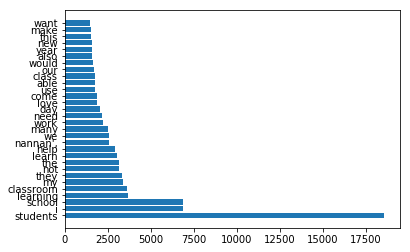

In [271]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

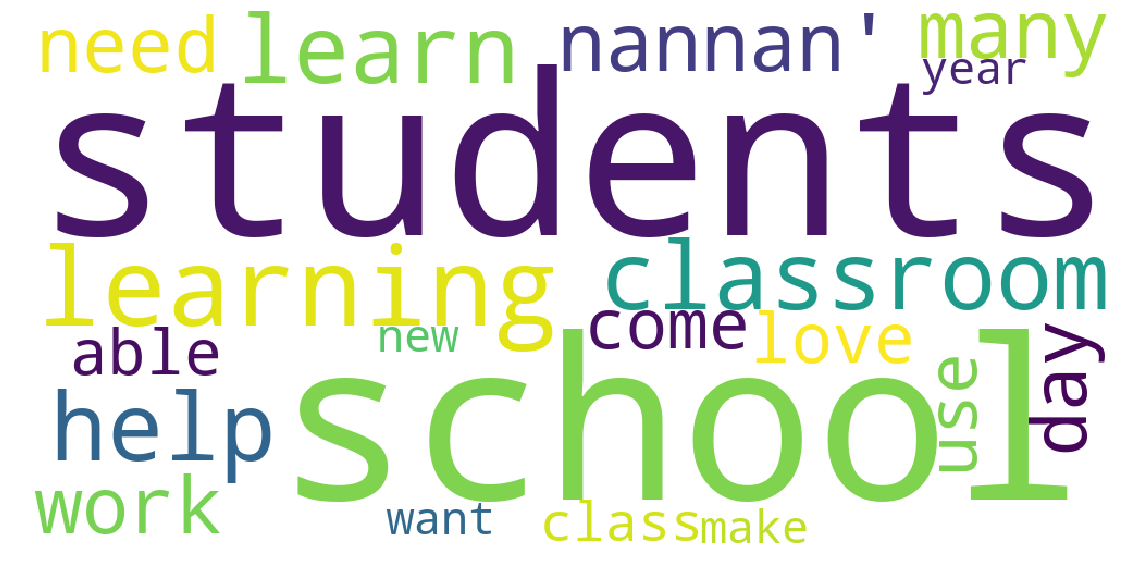

In [272]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

# For Cluster 4:

In [273]:
topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster4).split())
W = [word for word in cluster4 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [274]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 3537), ('i', 1331), ('school', 1239), ('not', 850), ('classroom', 662), ('my', 633), ('learning', 624), ('help', 581), ('many', 576), ('the', 533), ('they', 529), ("nannan',", 499), ('need', 464), ('learn', 441), ('reading', 412), ('we', 398), ('work', 382), ('use', 377), ('come', 371), ('able', 350), ('day', 307), ('class', 300), ('skills', 294), ('get', 289), ('time', 284), ('high', 279), ('one', 273), ('also', 271), ('this', 265), ('year', 264)]


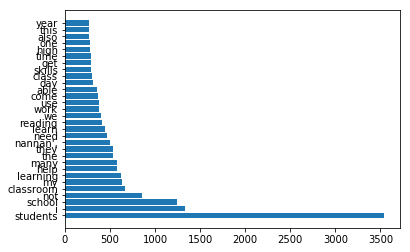

In [275]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

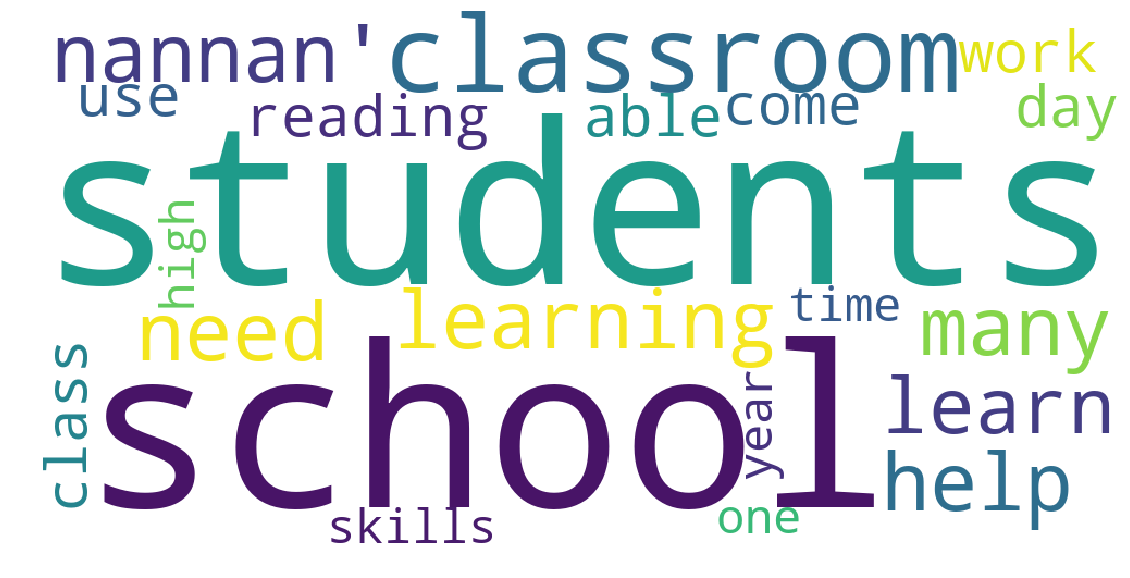

In [276]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

# For Cluster 5:

In [277]:
topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster5).split())
W = [word for word in cluster5 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [278]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 438), ('school', 196), ('i', 170), ('not', 127), ('they', 94), ('the', 82), ('need', 77), ('my', 76), ('many', 63), ("nannan',", 61), ('we', 56), ('classroom', 51), ('help', 51), ('come', 49), ('our', 46), ('use', 45), ('student', 45), ('reading', 43), ('class', 42), ('no', 41), ('make', 40), ('work', 40), ('able', 39), ('high', 39), ('learn', 39), ('math', 38), ('learning', 38), ('this', 38), ('get', 37), ('poverty', 36)]


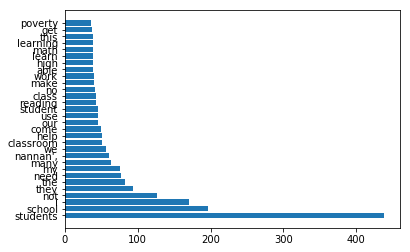

In [279]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

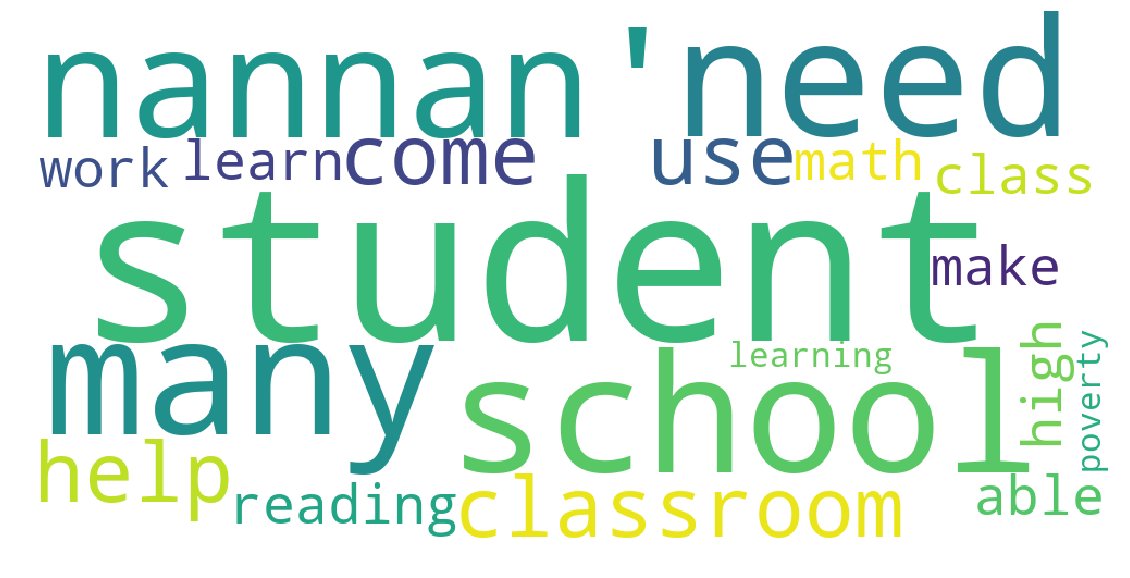

In [280]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

# For Cluster 6:

In [281]:
topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster6).split())
W = [word for word in cluster6 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [282]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 1412), ('i', 671), ('school', 569), ('my', 324), ('they', 302), ('the', 275), ('learning', 274), ('we', 255), ('need', 239), ('learn', 239), ('help', 239), ('classroom', 212), ('not', 209), ("nannan',", 205), ('make', 178), ('many', 175), ('work', 168), ('science', 165), ('day', 163), ('use', 155), ('want', 152), ('love', 147), ('class', 142), ('this', 135), ('year', 132), ('get', 130), ('come', 127), ('books', 123), ('children', 119), ('new', 119)]


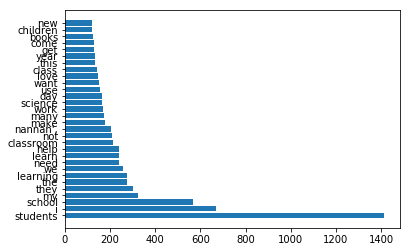

In [283]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

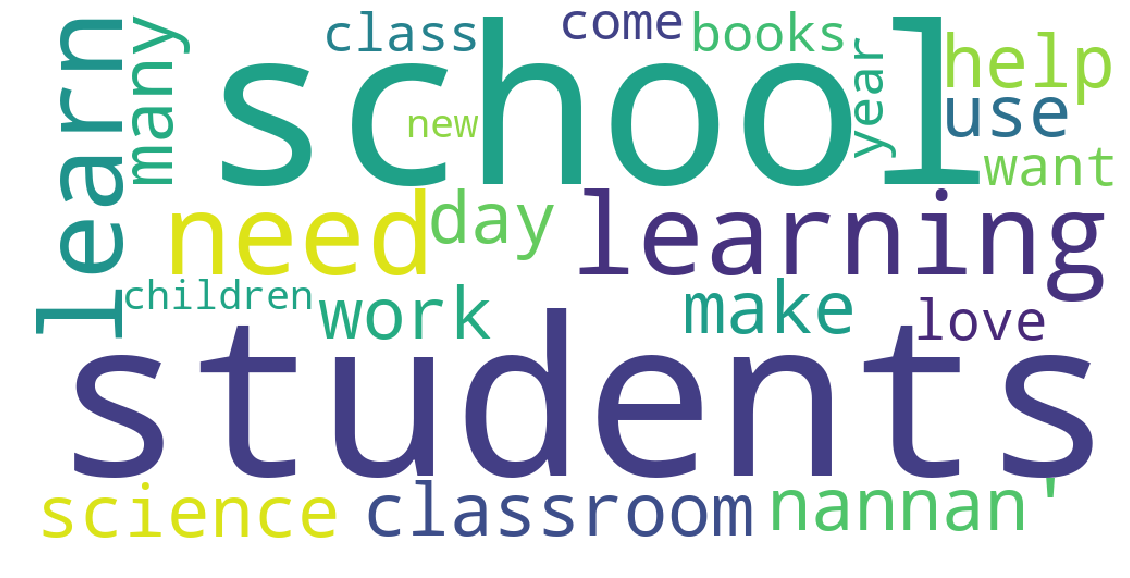

In [284]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

# For Cluster 7:

In [285]:
topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster7).split())
W = [word for word in cluster7 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [286]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 2254), ('i', 953), ('school', 771), ('learning', 530), ('classroom', 482), ('the', 423), ('my', 389), ('not', 358), ('help', 355), ('we', 336), ('learn', 324), ('they', 317), ("nannan',", 301), ('technology', 294), ('many', 287), ('work', 274), ('need', 255), ('able', 245), ('use', 231), ('come', 229), ('love', 227), ('class', 226), ('reading', 219), ('this', 218), ('would', 212), ('our', 204), ('new', 196), ('student', 193), ('make', 191), ('skills', 187)]


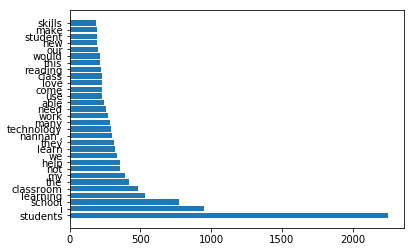

In [287]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

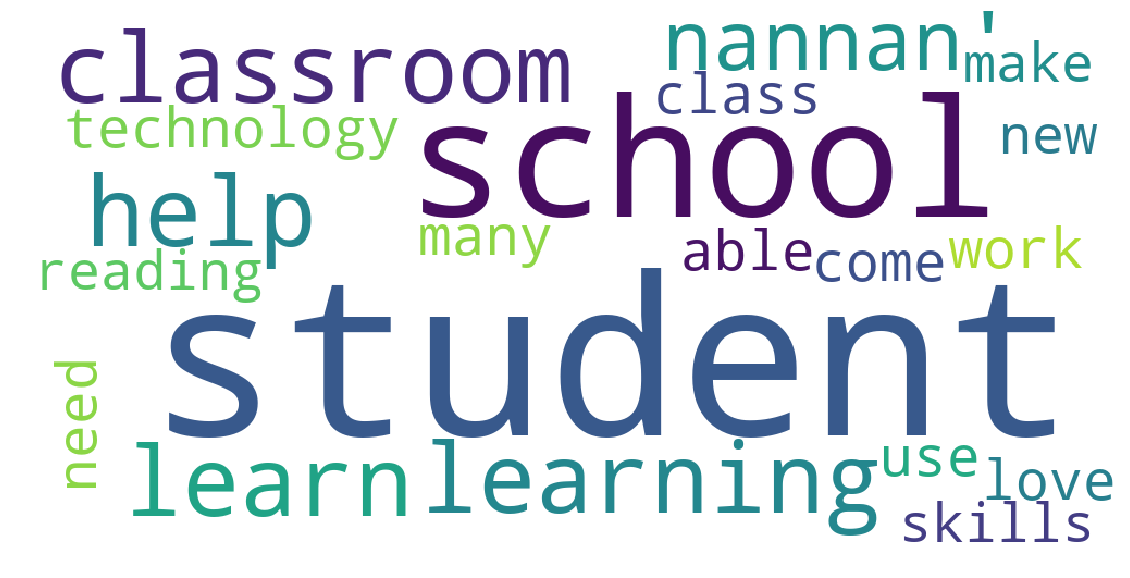

In [288]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

# For Cluster 8:

In [289]:
topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster8).split())
W = [word for word in cluster8 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [290]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 77), ('i', 29), ('school', 22), ('we', 18), ('classroom', 16), ('technology', 16), ('not', 14), ('they', 14), ('learning', 12), ('the', 12), ('world', 11), ('without', 11), ('want', 10), ('learn', 10), ('use', 10), ('access', 9), ('google', 9), ('kit', 9), ('one', 9), ("nannan',", 9), ('work', 9), ('need', 9), ('many', 9), ('able', 8), ('my', 8), ('would', 8), ('this', 8), ('also', 7), ('class', 7), ('explore', 7)]


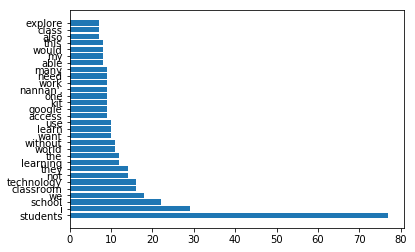

In [291]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

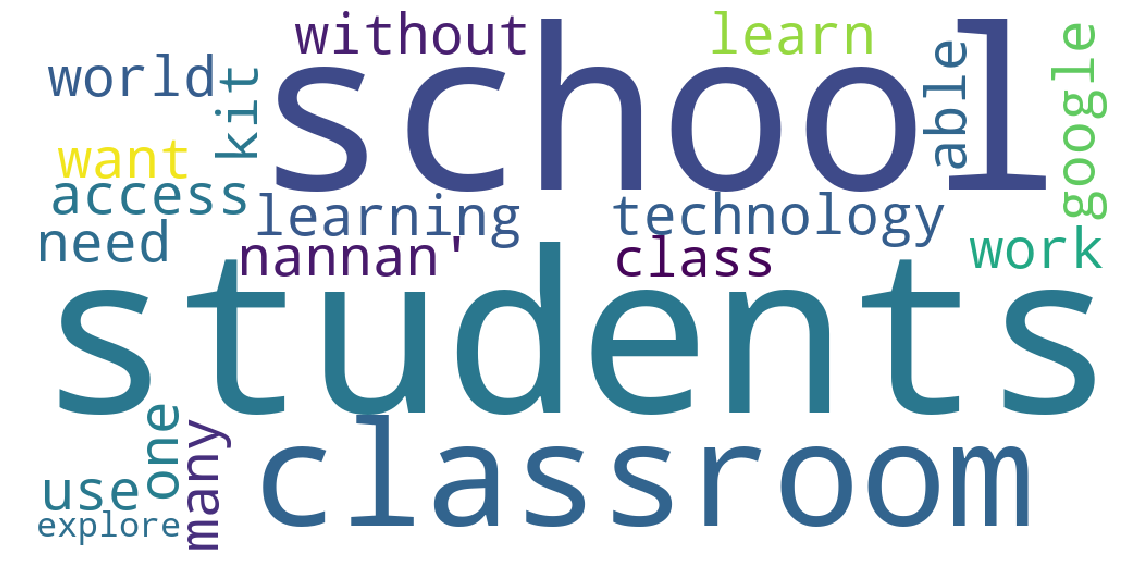

In [292]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

# For Cluster 9:

In [293]:
topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster9).split())
W = [word for word in cluster9 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [294]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 7285), ('i', 2543), ('school', 1815), ('classroom', 1777), ('learning', 1667), ('my', 1366), ('help', 1281), ('the', 1125), ('learn', 1092), ('not', 1014), ('they', 994), ('need', 990), ('work', 941), ("nannan',", 908), ('many', 869), ('needs', 843), ('day', 756), ('we', 740), ('skills', 692), ('able', 674), ('special', 672), ('class', 639), ('use', 587), ('reading', 581), ('come', 568), ('student', 567), ('would', 564), ('education', 553), ('also', 514), ('materials', 513)]


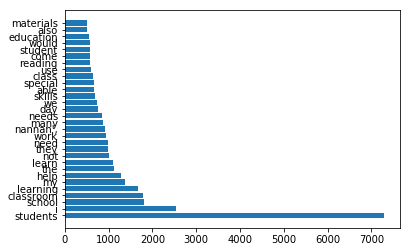

In [295]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

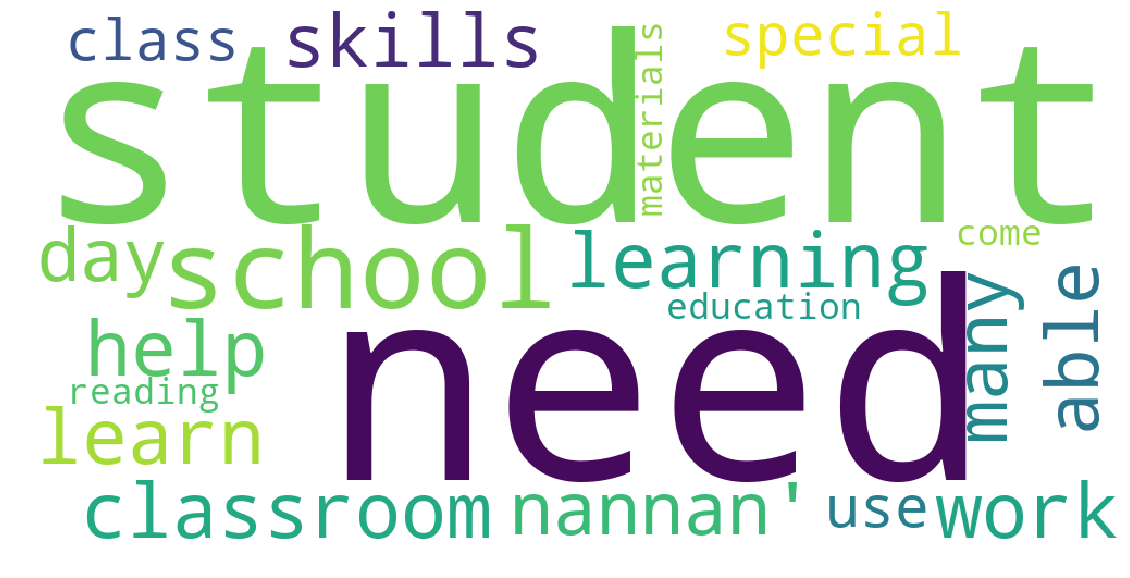

In [296]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

# For Cluster 10:

In [297]:
topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster10).split())
W = [word for word in cluster10 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [298]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 5290), ('i', 2319), ('school', 1696), ('learning', 1168), ('classroom', 1122), ('not', 886), ('the', 885), ('my', 846), ('they', 755), ('learn', 725), ('help', 709), ('many', 687), ('work', 615), ('need', 613), ('use', 606), ('we', 606), ('reading', 565), ('student', 534), ('skills', 526), ('would', 509), ('day', 509), ('also', 494), ('technology', 491), ('year', 467), ('class', 464), ("nannan',", 447), ('able', 424), ('make', 417), ('this', 411), ('one', 408)]


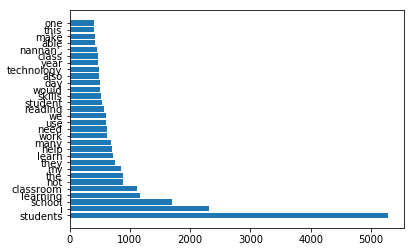

In [299]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

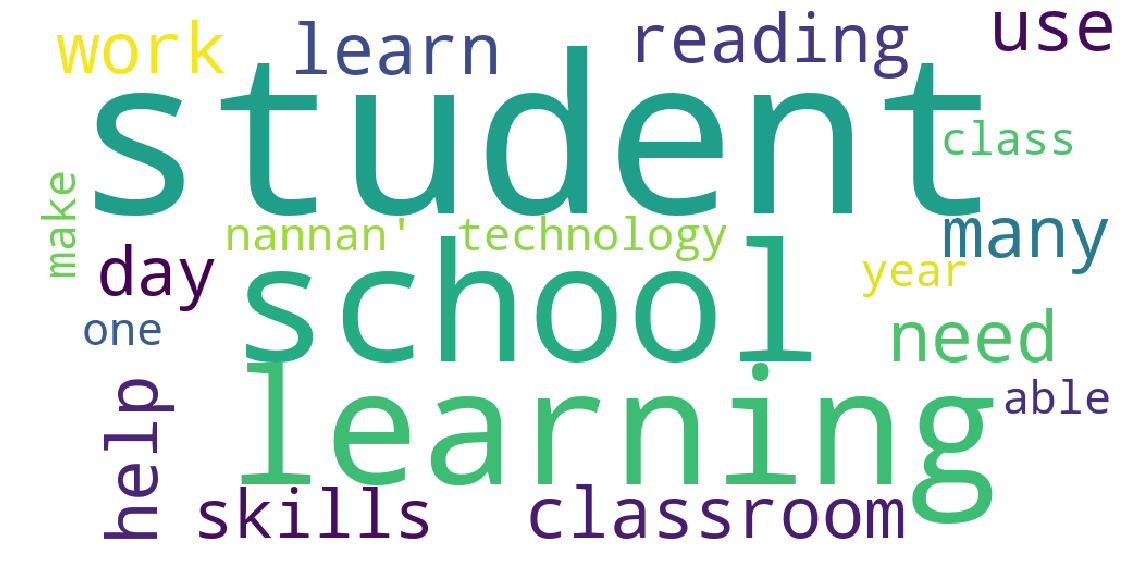

In [300]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

### Reading essays from a cluster

In [301]:
# Cluster 1
count=1
for i in range(3):
    if i < len(cluster1):
        print('Essay-%d : \n %s\n'%(count,cluster1[i]))
        count +=1

Essay-1 : 
 my students english learners working english second third languages we melting pot refugees immigrants native born americans bringing gift language school we 24 languages represented english learner program students every level mastery we also 40 countries represented families within school each student brings wealth knowledge experiences us open eyes new cultures beliefs respect the limits language limits world ludwig wittgenstein our english learner strong support system home begs resources many times parents learning read speak english along side children sometimes creates barriers parents able help child learn phonetics letter recognition reading skills by providing dvd players students able continue mastery english language even no one home able assist all families students within level 1 proficiency status offered part program these educational videos specially chosen english learner teacher sent home regularly watch the videos help child develop early reading skills 

In [302]:
# Cluster 4
count=1
for i in range(3):
    if i < len(cluster4):
        print('Essay-%d : \n %s\n'%(count,cluster4[i]))
        count +=1

Essay-1 : 
 true champions not always ones win guts by mia hamm this quote best describes students cholla middle school approach playing sports especially girls boys soccer teams the teams made 7th 8th grade students not opportunity play organized sport due family financial difficulties i teach title one middle school urban neighborhood 74 students qualify free reduced lunch many come activity sport opportunity poor homes my students love participate sports learn new skills apart team atmosphere my school lacks funding meet students needs i concerned lack exposure not prepare participating sports teams high school by end school year goal provide students opportunity learn variety soccer skills positive qualities person actively participates team the students campus come school knowing face uphill battle comes participating organized sports the players would thrive field confidence appropriate soccer equipment play soccer best abilities the students experience helpful person part team t

In [303]:
# Cluster 6
count=1
for i in range(3):
    if i < len(cluster6):
        print('Essay-%d : \n %s\n'%(count,cluster6[i]))
        count +=1

Essay-1 : 
 my students awesome they creative excited learning i privileged teach music rural public school serving 900 students grades kindergarten 4th including special group children facing severe physical mental disabilities in school high poverty i strive daily provide equitable music experience students this experience includes exposing students new instruments musical cultures music history music expression self because many students lack funding physical ability travel unique musical settings i strive bring creative musical world classroom i want see students get healthier teaching students means american teaching folk songs step down african american traditions american folk songs children anna banana 101 jump rope well types folk songs games jumping rope dancing we jumping rope songs like sheep meadow dancing songs like little sally water playing games songs this incorporates history well music i think lots fun students well we get moving still learning nannan

Essay-2 : 
 or

In [304]:
# Cluster 10
count=1
for i in range(3):
    if i < len(cluster10):
        print('Essay-%d : \n %s\n'%(count,cluster10[i]))
        count +=1

Essay-1 : 
 all students receive free breakfast lunch school care struggle life great kids these young minds eager learn waiting opportunities succeed they wonderful around really enjoy spending time friends teachers community members coaches whenever opportunity they already experienced obstacles adults ever encounter fewer 25 students meeting grade level standards absolutely love forming rapports learning high interest resources manipulate sharing special talents singing dancing cooking etc normal kid when get see come life sharing special talents non instructional time reinforces flashes success confidence eventually transfer classroom academically please give students chance basic school need backpacks develop holistic enjoyment school supporting project you create lifetime learners unlock opportunities may otherwise nonexistent with three chromebooks i teach common core standards efficiently enhancing small group learning center classroom our new technology offer opportunities cla

# DBSCAN

## Function To Compute Distance of nth-nearest neighbour

In [76]:
# function to determine the distance of nth-nearest neighbour to all points in a multi-dimensional array
def n_neighbour(vectors , n):
    distance = []
    for point in vectors:
        temp = np.sort(np.sum((vectors-point)**2,axis=1),axis=None)
        distance.append(temp[n])
    return np.sqrt(np.array(distance))    

##  Function to call DBSCAN

In [77]:
# Function definition for implementing DBSCAN
def dbscan(epsilon, samples, Data):
    from sklearn.cluster import DBSCAN
    db = DBSCAN(eps=epsilon, min_samples=samples, n_jobs=-1).fit(Data)
    
    # Number of clusters in labels, ignoring noise(-1) if present.
    n_clusters = len(set(db.labels_))
    print("Number of clusters for MinPts = %d and Epsilon = %f is : %d "%(samples,epsilon,n_clusters))
    print("Labels(-1 is for Noise) : ",set(db.labels_))
    print()
    return db

## ELBOW METHOD TO FIND RIGHT EPSILON :

In [78]:
X_new_agg = X_new.todense()[:5000]

In [79]:
# Standardising the data
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(X_new_agg)

In [80]:
data.shape

(5000, 6000)

In [81]:
min_points = 8 
# (ln(5000)=8.5)
# Computing distances of nth-nearest neighbours
distances = n_neighbour(data,min_points)


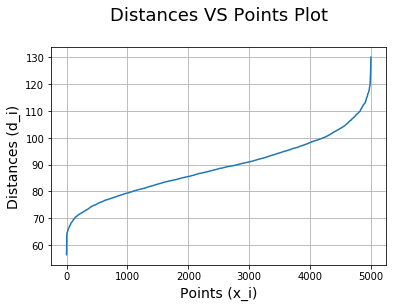

In [83]:
sorted_distance = np.sort(distances)
points = [i for i in range(X_new_agg.shape[0])]

# Draw distances(d_i) VS points(x_i) plot
plt.plot(points, sorted_distance)
plt.xlabel('Points (x_i)',size=14)
plt.ylabel('Distances (d_i)',size=14)
plt.title('Distances VS Points Plot\n',size=18)
plt.grid()
plt.show()

In [84]:
optimal_eps = 110
# Clustering with right epsilon
db1 = dbscan(optimal_eps, min_points, data)

Number of clusters for MinPts = 8 and Epsilon = 110.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}



- the right value of Epsilon is 110

# Creating clusters

In [88]:
cluster1 = []
cluster2 = []



for i in range(db1.labels_.shape[0]):
    if db1.labels_[i] == 0:
        cluster1.append(essays[i])
    
    else :
        cluster2.append(essays[i])
    
        
# Number of essays in different clusters
print("No. of essays in Cluster-1 : ",len(cluster1))
print("\nNo. of essays in Cluster-2 : ",len(cluster2))



No. of essays in Cluster-1 :  4921

No. of essays in Cluster-2 :  79


## Word Cloud for Cluster 1:

In [90]:
from nltk import download, FreqDist, WordNetLemmatizer

topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster1).split())
W = [word for word in cluster1 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [91]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 35743), ('i', 13929), ('school', 11678), ('learning', 8043), ('classroom', 7834), ('my', 6418), ('they', 5930), ('the', 5922), ('not', 5820), ('learn', 5611), ('help', 5468), ('many', 4788), ("nannan',", 4694), ('we', 4395), ('need', 4230), ('work', 4105), ('reading', 4061), ('use', 3836), ('love', 3590), ('day', 3512), ('able', 3394), ('come', 3362), ('class', 3228), ('technology', 3121), ('would', 3105), ('also', 2987), ('skills', 2948), ('books', 2829), ('this', 2810), ('year', 2772)]


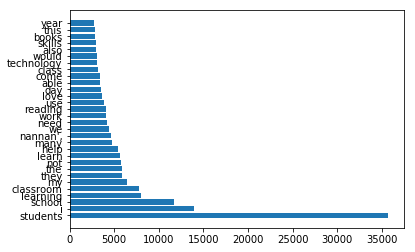

In [92]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

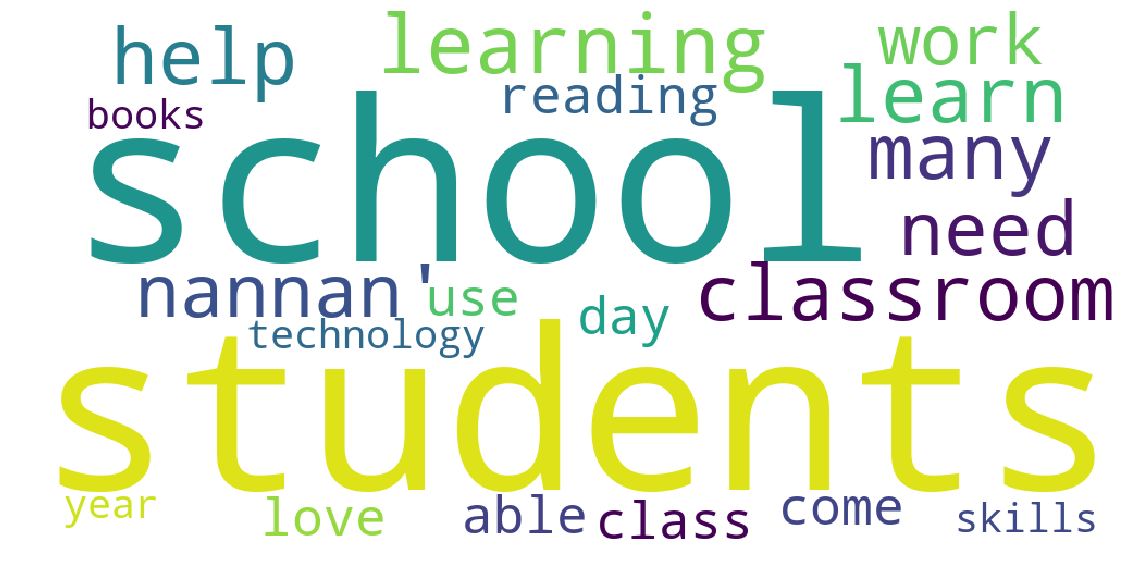

In [93]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

## Word Cloud for Cluster 2:

In [94]:
topWords = []
topWordsCount = []
freqDistribution = FreqDist(str(cluster2).split())
W = [word for word in cluster2 if word not in stopwords]
#Identify the top 500 words 
count = 0 
for word, value in freqDistribution.most_common():
    if(word in W):
        topWords.append(word)
        topWordsCount.append(value)
        count = count + 1
        if(count == 500):
            break

In [95]:
mostcommon = freqDistribution.most_common(30)
print(mostcommon)

[('students', 530), ('school', 215), ('i', 198), ('my', 98), ('the', 97), ('we', 96), ('not', 95), ('they', 84), ('help', 79), ('classroom', 78), ("nannan',", 74), ('learning', 67), ('many', 65), ('learn', 64), ('year', 63), ('work', 55), ('class', 53), ('day', 51), ('our', 49), ('use', 49), ('would', 49), ('one', 48), ('make', 46), ('need', 45), ('this', 45), ('new', 45), ('life', 42), ('student', 41), ('high', 40), ('get', 39)]


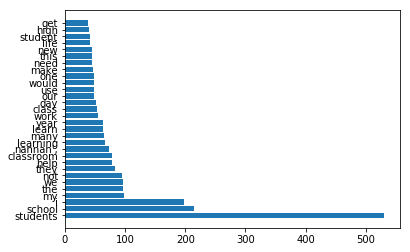

In [96]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

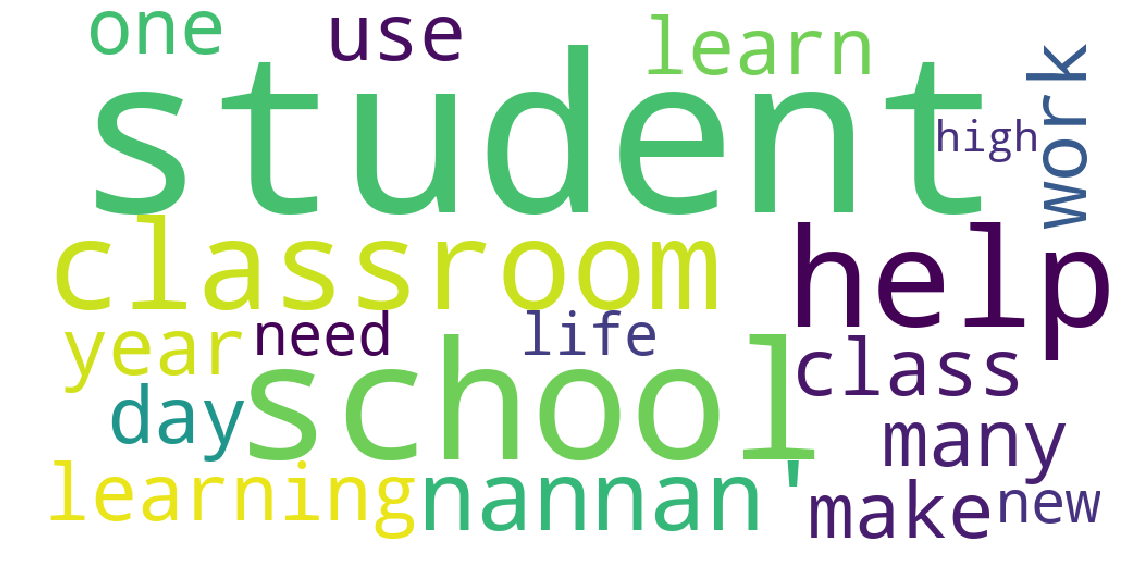

In [97]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(val[0] for val in mostcommon)
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Word_Cloud_tfidf"+".png", bbox_inches='tight')
plt.show()
plt.close()

## Pretty Table

In [100]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer Used", "Model", "Tried on 'n' clusters"]

x.add_row(["TFIDF", "KMeans Clustering(Optimal k = 5)", "5"])
x.add_row(["TFIDF", "Agglomerative Clustering","2,5 and 10"])
x.add_row(["TFIDF", "DBSCAN Clustering(minPts=8, Optimal Epsilon=110)","2"])



print(x)

+-----------------+--------------------------------------------------+-----------------------+
| Vectorizer Used |                      Model                       | Tried on 'n' clusters |
+-----------------+--------------------------------------------------+-----------------------+
|      TFIDF      |         KMeans Clustering(Optimal k = 5)         |           5           |
|      TFIDF      |             Agglomerative Clustering             |       2,5 and 10      |
|      TFIDF      | DBSCAN Clustering(minPts=8, Optimal Epsilon=110) |           2           |
+-----------------+--------------------------------------------------+-----------------------+


<h1>3. Conclusions</h1>


## Procedure followed for K-Means :-

1. Fetch the preprocessed data and TFIDF vectorised data(Similarly we can do for Bow, W2V etc.)

1. Implementing KMeans Clustering

1. Create Clusters

1. Plot WordCloud for each clusters

1. Reading reviews manually for both algorithm KMeans


## Procedure Followed for __Agglomerative Clustering:-__
1. Fetch the preprocessed  data and TFIDF vectorised data(Similarly we can do for Bow, W2V etc.)

1. Implementing Hierarchical Clustering using multiple values of clusters such as 2,5 and 10

1. Plotted Word Cloud for all the clusters.

1. Reading reviews manually for each cluster 2,5 and 10



## Procedure Followed for DBSCAN :-

1. Fetch the preprocessed data and TFIDF vectorised data(Similarly we can do for Bow, W2V etc.)

1. Then vectorize the data to apply DBSCAN Clustering

1. Standardizing the vectorized data

1. Select the minPts.  

1. Applying the Elbow Method or knee method in order to find the correct value of Epsilon

1. Plot distances(radius) VS points to know the inflection point for right value of epsilon

1. Implementing DBSCAN Cluster with optimal Epsilon

1. Create clusters and plot the WordCloud for each cluster